In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
import pprint
import seaborn as sns



In [2]:
df = pd.read_csv("../SOURCES/3X-Tripled_Dataset_With_Unique_Employee_IDs.csv")
df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Remote,43,7,2,Medium,Depression,No,Decrease,4,Satisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,48,4,1,Medium,Anxiety,No,Increase,2,Unsatisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,43,11,5,Medium,Anxiety,No,No Change,4,Satisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,59,8,4,High,Anxiety,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,57,12,2,High,Anxiety,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,EMP14996,32,Male,Sales,Consulting,4,Remote,50,2,5,High,Depression,Yes,Decrease,2,Unsatisfied,1,Weekly,Average,Asia
14996,EMP14997,39,Female,Sales,Healthcare,27,Onsite,44,15,1,Low,NaN,Yes,Decrease,2,Unsatisfied,1,NaN,Average,Africa
14997,EMP14998,42,Female,Sales,Healthcare,21,Remote,41,1,4,High,Anxiety,No,Increase,4,Satisfied,1,Daily,Poor,Oceania
14998,EMP14999,27,Female,Sales,Healthcare,26,Remote,27,0,5,Low,NaN,Yes,Increase,5,Neutral,4,Daily,Average,Asia


In [3]:
print(df.shape)
print(df.columns)

(15000, 20)
Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')


In [4]:
df.isnull().sum()
# Only Mental_Health_Condition and Physical_Activity

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              6153
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    4887
Sleep_Quality                           0
Region                                  0
dtype: int64

In [5]:
df.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,40.995000,17.810200,40.158267,7.559000,2.984200,3.356933,3.007800
std,11.295268,10.019744,10.916707,4.635812,1.410419,1.455269,1.398953
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,43.000000,8.000000,3.000000,4.000000,3.000000
75%,51.000000,26.000000,47.000000,12.000000,4.000000,5.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [6]:
df.describe(include=['object'])

,Employee_ID,Gender,Job_Role,Industry,Work_Location,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Satisfaction_with_Remote_Work,Physical_Activity,Sleep_Quality,Region
count,15000,15000,15000,15000,15000,15000,8847,15000,15000,15000,10113,15000,15000
unique,15000,4,7,7,3,3,3,2,3,3,2,3,6
top,EMP0001,Female,Project Manager,Finance,Hybrid,High,Anxiety,No,Increase,Unsatisfied,Weekly,Good,Oceania
freq,1,3822,2214,2241,6000,5058,3873,7659,6134,7315,5265,5061,2601


In [7]:
# Considering what genders are used
df['Gender'].unique()

array(['Non-binary', 'Female', 'Male', 'Prefer not to say'], dtype=object)

In [8]:
# Identify the types of jobs that we are looking at
# How could we categorize them if possible?
df['Job_Role'].unique()

array(['HR', 'Data Scientist', 'Software Engineer', 'Sales', 'Marketing',
       'Designer', 'Project Manager'], dtype=object)

In [9]:
# Consider to categorize work more on type of industry, perhaps to see
# the background of the work has more of an affect than the type of work
df['Industry'].unique()

array(['Healthcare', 'IT', 'Education', 'Finance', 'Consulting',
       'Manufacturing', 'Retail'], dtype=object)

In [10]:
# physical activity: want to check what is reported here?
df['Physical_Activity'].unique()
# Perhaps this could be an error in the answering of this question?
# nan could mean that they aren't exercising at all

array(['Weekly', nan, 'Daily'], dtype=object)

In [11]:
# Checking Mental_Health_Condition
df['Mental_Health_Condition'].unique()
# Perhaps the nan, may refer to the fact that they are reporting 
# No bad mental health condition, since the other three are negative
# Types of mental states, for now consider nan as positive
# i.e., employee is reporting no problems with mental health

array(['Depression', 'Anxiety', nan, 'Burnout'], dtype=object)

In [12]:
df_fixed = df
df_fixed['Physical_Activity'] = df_fixed['Physical_Activity'].fillna('None')
df_fixed['Mental_Health_Condition'] = df_fixed['Mental_Health_Condition'].fillna('Stable')
# Changed nan values so that they would be more inkeeping with possible 
# intended values. These new ones will help with keeping data readable
df_fixed.isnull().sum()

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

In [13]:
df_fixed.dtypes

Employee_ID                          object
Age                                   int64
Gender                               object
Job_Role                             object
Industry                             object
Years_of_Experience                   int64
Work_Location                        object
Hours_Worked_Per_Week                 int64
Number_of_Virtual_Meetings            int64
Work_Life_Balance_Rating              int64
Stress_Level                         object
Mental_Health_Condition              object
Access_to_Mental_Health_Resources    object
Productivity_Change                  object
Social_Isolation_Rating               int64
Satisfaction_with_Remote_Work        object
Company_Support_for_Remote_Work       int64
Physical_Activity                    object
Sleep_Quality                        object
Region                               object
dtype: object

In [14]:
# Checking against specific social factor:
df_fixed['Social_Isolation_Rating'].unique()
# Assume Isolation rating is meant to be ranged from 1-5, one is low, 5 is high

array([4, 2, 3, 5, 1], dtype=int64)

In [28]:
df_fixed['Social_Isolation_Rating'].value_counts()

Social_Isolation_Rating
4    4307
5    4242
1    2482
2    2473
3    1496
Name: count, dtype: int64

In [19]:
df_fixed['Number_of_Virtual_Meetings'].unique()
# Number of virtual meetings is not scaled, just the number that happens, lets assume its per week

array([ 7,  4, 11,  8, 12,  3,  6, 13,  9,  1, 15, 14, 10,  2,  0,  5],
      dtype=int64)

In [25]:
df_fixed['Work_Life_Balance_Rating'].unique()

array([2, 1, 5, 4, 3], dtype=int64)

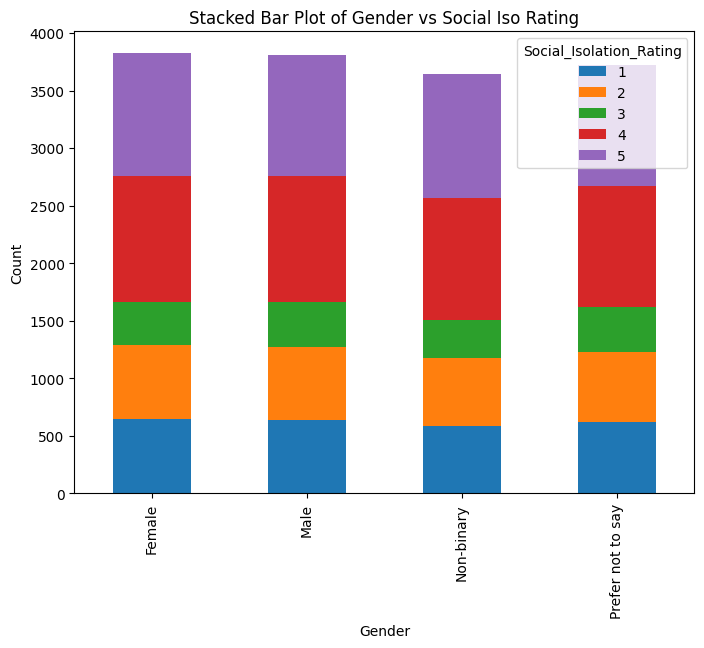

In [16]:
# Stacked bar chart of gender versus social iso

pivot_df = df_fixed.pivot_table(index='Gender', columns='Social_Isolation_Rating', aggfunc='size', fill_value=0)

# Plot stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Stacked Bar Plot of Gender vs Social Iso Rating')
plt.ylabel('Count')
plt.show()

## Social_Isolation_Rating versus Virtual_Meetings

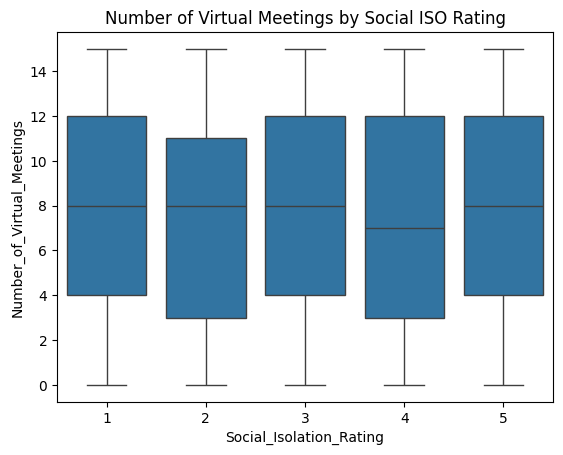

In [21]:
# Chart relating soc-iso-rating to # of virtual meetings
# Social-iso-rating is a categorical number, i.e., 1-5 is more of a scale
# # of virtual meetings
Boxplot
sns.boxplot(x='Social_Isolation_Rating', y='Number_of_Virtual_Meetings', data=df_fixed)
plt.title('Number of Virtual Meetings by Social ISO Rating')
plt.show()



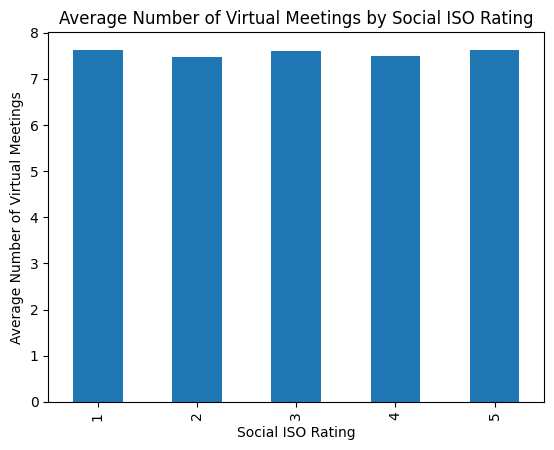

In [22]:
# Calculate the mean number of meetings for each Social-ISO-Rating
mean_meetings = df_fixed.groupby('Social_Isolation_Rating')['Number_of_Virtual_Meetings'].mean()

# Plot the bar chart
mean_meetings.plot(kind='bar')
plt.title('Average Number of Virtual Meetings by Social ISO Rating')
plt.xlabel('Social ISO Rating')
plt.ylabel('Average Number of Virtual Meetings')
plt.show()

## Social_Isolation_Rating versus Work_Life_Balance_Rating

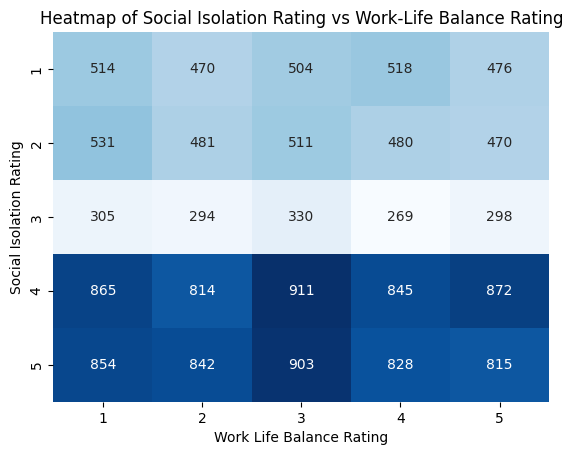

In [27]:
# Charts based on soc-iso and work-life balance: Social_Isolation_Rating / Work_Life_Balance_Rating              
# work-life is categorical
# Create a contingency table
cross_tab = pd.crosstab(df_fixed['Social_Isolation_Rating'], df_fixed['Work_Life_Balance_Rating'])

# Plot the heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Heatmap of Social Isolation Rating vs Work-Life Balance Rating')
plt.xlabel('Work Life Balance Rating')
plt.ylabel('Social Isolation Rating')
plt.show()



The above chart is meant to act as a heatmap that shows how many times each categorical value occurs against each other in the sum of the data. It isn't really helpful though when you look at them based on the value counts we have for each categorical value for social-isolation-rating. This is because it follows the trend in how many each rating has, i.e., 4 and 5 (high isolation) has twice the reporters as 1 and 2 respectively, so if there are more instances of each combination its just because they have more possible instances. Otherwise the dispersion of the combinations are very similar. not useful  

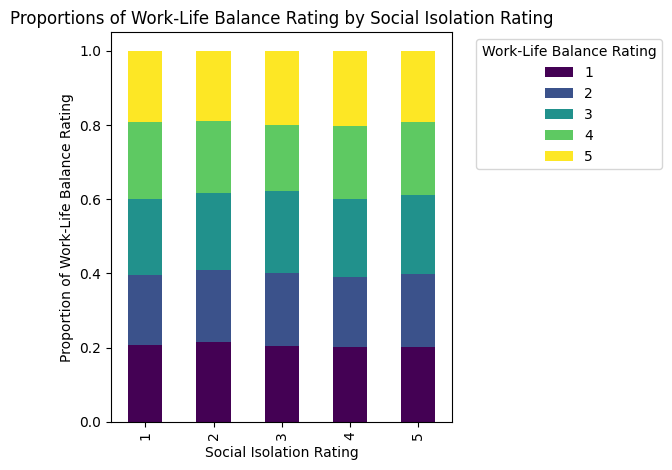

In [29]:
# Create a stacked bar chart
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0)  # Normalize the counts to percentages

cross_tab_percent.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Proportions of Work-Life Balance Rating by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Proportion of Work-Life Balance Rating')
plt.legend(title='Work-Life Balance Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

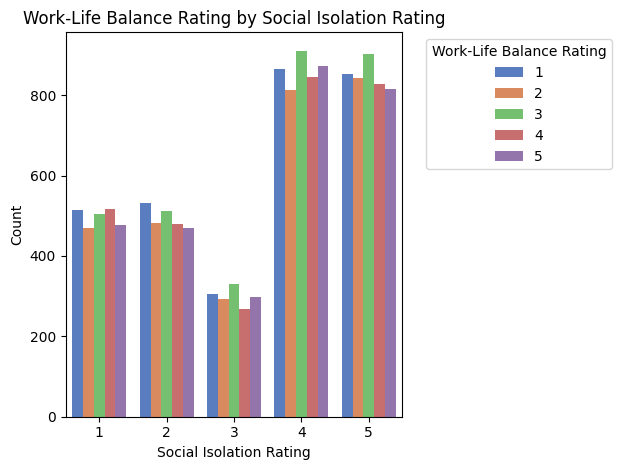

In [30]:
sns.countplot(data=df_fixed, x='Social_Isolation_Rating', hue='Work_Life_Balance_Rating', palette='muted')
plt.title('Work-Life Balance Rating by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Count')
plt.legend(title='Work-Life Balance Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Clearly shows the distinction in what was said using the heatmap above. The values for each social isolation rating against work-life balance rating are evenly distributed amongst each social isolation rating. All that can really be said, is that there are double the amount of people reporting high social isolation than low social isolation.

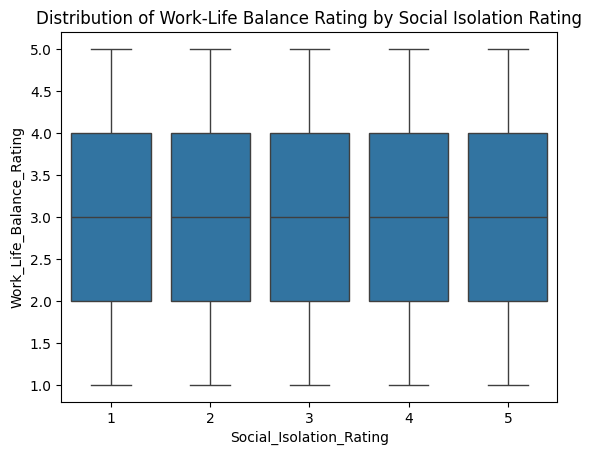

In [33]:
sns.boxplot(x='Social_Isolation_Rating', y='Work_Life_Balance_Rating', data=df_fixed)
plt.title('Distribution of Work-Life Balance Rating by Social Isolation Rating')
plt.show()

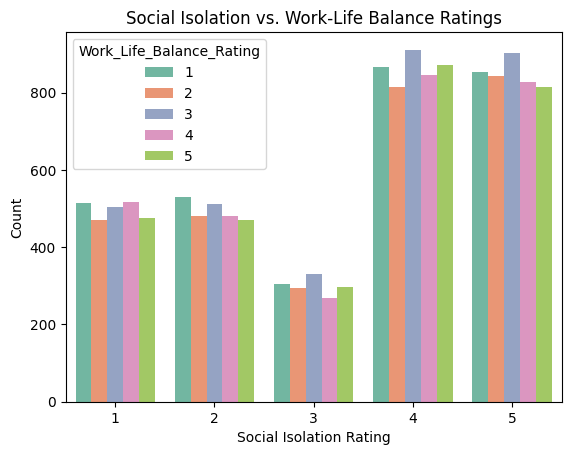

## Social_Isolation_Rating versus Satisfaction_with_Remote_Work [Definite Trend]
- Satisfaction_with_Remote_Work is a categorical variable
- Trend found: Satisfaction_with_Remote_Work definitely increases in reporting when subject reports high social isolation. Lower social isolation tends to have have unsatisfied reports, with a decent middle ground between medium isolation ratings in unsatisfied groups.

In [39]:
df_fixed['Satisfaction_with_Remote_Work'].unique()

array(['Satisfied', 'Unsatisfied', 'Neutral'], dtype=object)

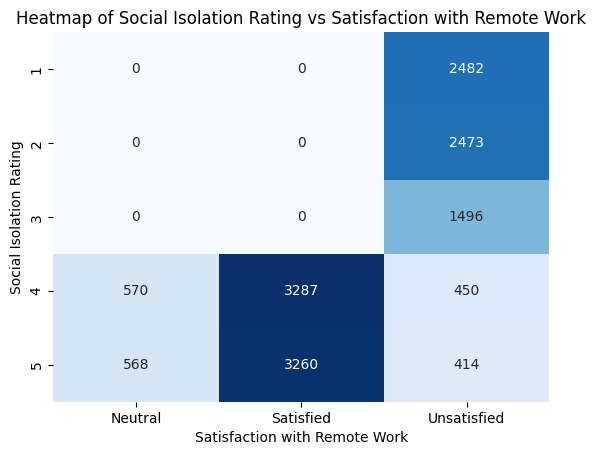

In [41]:
# Create a contingency table
cross_tab_s = pd.crosstab(df_fixed['Social_Isolation_Rating'], df_fixed['Satisfaction_with_Remote_Work'])

# Plot the heatmap
sns.heatmap(cross_tab_s, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Heatmap of Social Isolation Rating vs Satisfaction with Remote Work')
plt.xlabel('Satisfaction with Remote Work')
plt.ylabel('Social Isolation Rating')
plt.show()

The above chart is actually really interesting. It shows that there are more people by a large margin reporting social isolation at a high level, while also maintaining that they are satisfied with remote work. While also showing that there are a large, if not smaller, group of people reporting that they are unsatisfied with remote work but state a low social isolation rating. At the same time, there is a distinct middle ground between people who are unsatisfied remote work, but are neutral in feeling isolated. Possibly a play on personality types, with introverted people feeling happy with working alone, but also feeling that loneliness, while extroverts have people around them they can be social with and would wish they had that in there work as well. The middle ground group helps this, as people aren't always extremes and many may fall in between the two extremes of social interest.

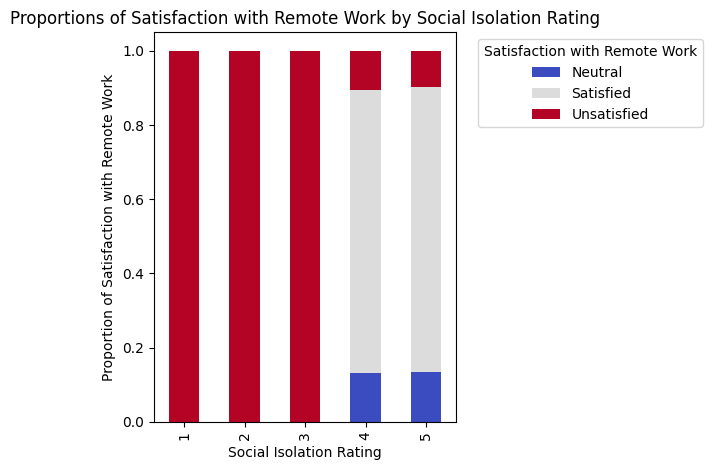

In [42]:
# Create a contingency table and normalize to proportions
cross_tab_percent_s = cross_tab_s.div(cross_tab_s.sum(axis=1), axis=0)

# Plot the stacked bar chart
cross_tab_percent_s.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Proportions of Satisfaction with Remote Work by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Proportion of Satisfaction with Remote Work')
plt.legend(title='Satisfaction with Remote Work', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

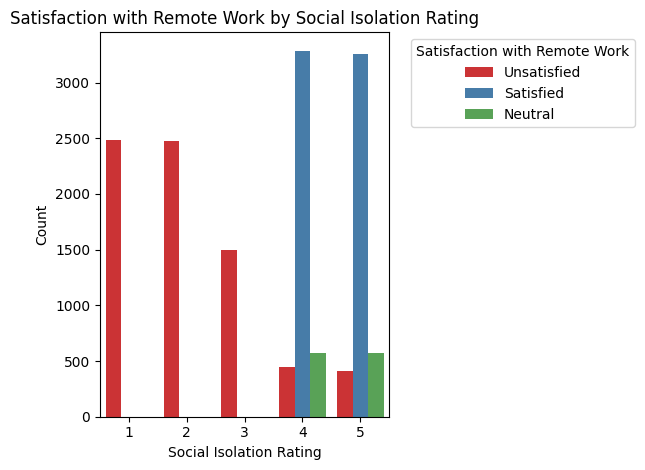

In [43]:
sns.countplot(data=df_fixed, x='Social_Isolation_Rating', hue='Satisfaction_with_Remote_Work', palette='Set1')
plt.title('Satisfaction with Remote Work by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Count')
plt.legend(title='Satisfaction with Remote Work', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Social_Isolation_Rating versus Work_Location                        

In [44]:
df_fixed['Work_Location'].unique()

array(['Remote', 'Hybrid', 'Onsite'], dtype=object)

In [49]:
df_fixed['Work_Location'].value_counts()

Work_Location
Hybrid    6000
Remote    4950
Onsite    4050
Name: count, dtype: int64

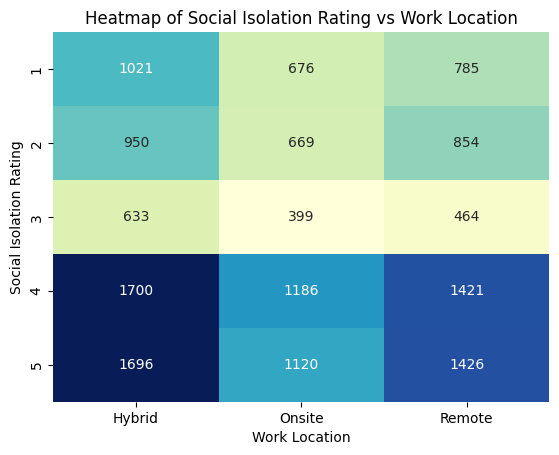

In [45]:
# Create a contingency table
cross_tab_w = pd.crosstab(df_fixed['Social_Isolation_Rating'], df_fixed['Work_Location'])

# Plot the heatmap
sns.heatmap(cross_tab_w, annot=True, cmap='YlGnBu', fmt='d', cbar=False)
plt.title('Heatmap of Social Isolation Rating vs Work Location')
plt.xlabel('Work Location')
plt.ylabel('Social Isolation Rating')
plt.show()

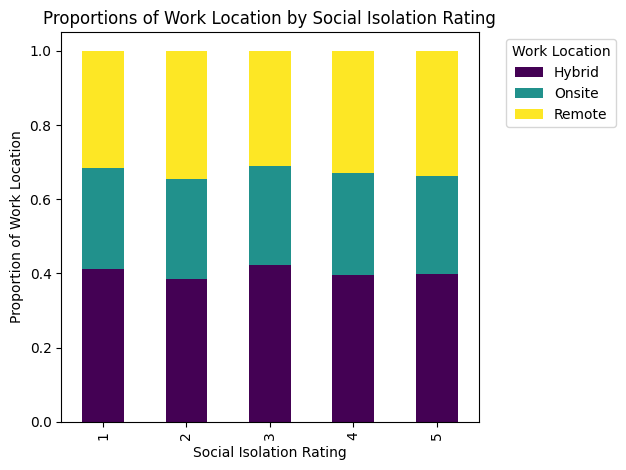

In [46]:
cross_tab_percent_w = cross_tab_w.div(cross_tab_w.sum(axis=1), axis=0)

# Plot the stacked bar chart
cross_tab_percent_w.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Proportions of Work Location by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Proportion of Work Location')
plt.legend(title='Work Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

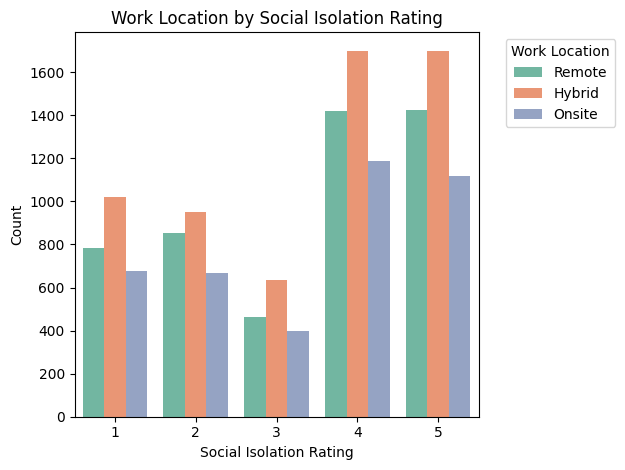

In [47]:
sns.countplot(data=df_fixed, x='Social_Isolation_Rating', hue='Work_Location', palette='Set2')
plt.title('Work Location by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Count')
plt.legend(title='Work Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

After considering the grouped bar charts and the heatmap created for social isolation against work location, it would seem that the ratings for each variable are distributed evenly per each work location. It follows the trend that there are more people reporting a social isolation factor based on the fact that there are just more people in that type of work location to report in. It can't be said that there is a definitive connection between social isolation and work location.

## Social_Isolation_Rating versus Years_of_Experience
- Years of experience is continuous in data type
- The data is somewhat evenly distributed around the multiple years of experience, so trends here should be interesting

In [51]:
df_fixed['Years_of_Experience'].unique()


array([13,  3, 22, 20, 32, 31, 24,  6,  9, 28, 17,  1,  5, 23, 30, 33, 21,
       11, 34,  4, 29, 27, 10, 18, 14, 26, 12,  7, 25,  8, 15, 35,  2, 19,
       16], dtype=int64)

In [52]:
df_fixed['Years_of_Experience'].value_counts()

Years_of_Experience
23    513
26    504
6     477
9     477
13    471
7     471
29    471
3     468
21    465
10    465
30    459
12    453
25    444
4     444
14    444
18    438
33    438
22    429
1     426
19    411
20    411
34    411
24    405
16    402
31    399
8     399
2     399
5     393
27    390
17    384
28    384
11    378
32    375
15    366
35    336
Name: count, dtype: int64

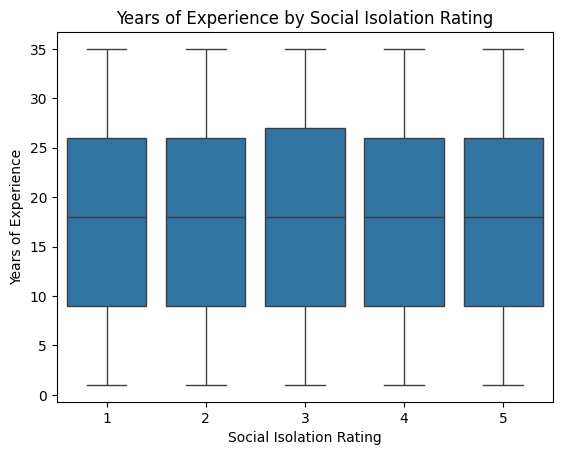

In [53]:
# Create a boxplot for Years_of_Experience by Social_Isolation_Rating
sns.boxplot(x='Social_Isolation_Rating', y='Years_of_Experience', data=df_fixed)
plt.title('Years of Experience by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Years of Experience')
plt.show()

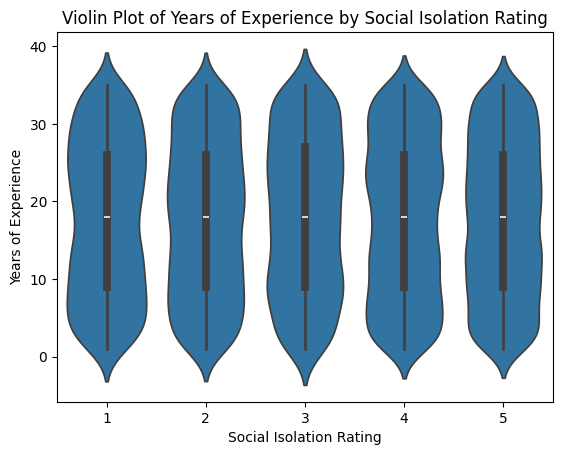

In [54]:
sns.violinplot(x='Social_Isolation_Rating', y='Years_of_Experience', data=df_fixed)
plt.title('Violin Plot of Years of Experience by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Years of Experience')
plt.show()

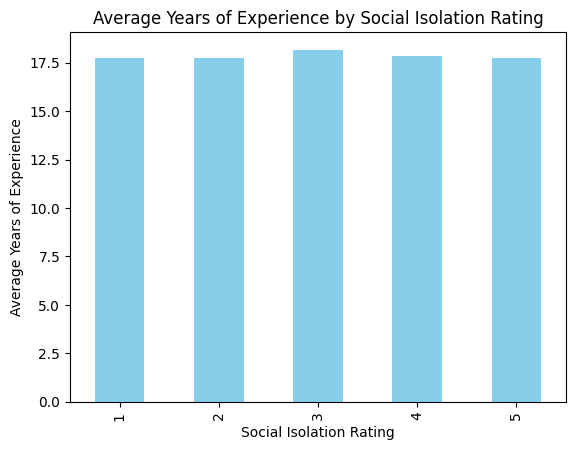

In [55]:
# Calculate the mean Years_of_Experience for each Social_Isolation_Rating
mean_experience = df_fixed.groupby('Social_Isolation_Rating')['Years_of_Experience'].mean()

# Plot the bar chart
mean_experience.plot(kind='bar', color='skyblue')
plt.title('Average Years of Experience by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Average Years of Experience')
plt.show()

Overall, the data did not seem to be useful, as it just showed that the data was essentially evenly distributed across the social isolation rating. So not very helpful.

## Social_Isolation_Rating versus Industry

In [56]:
df_fixed['Industry'].unique()

array(['Healthcare', 'IT', 'Education', 'Finance', 'Consulting',
       'Manufacturing', 'Retail'], dtype=object)

In [57]:
df_fixed['Industry'].value_counts()

Industry
Finance          2241
IT               2238
Healthcare       2184
Retail           2178
Education        2070
Manufacturing    2049
Consulting       2040
Name: count, dtype: int64

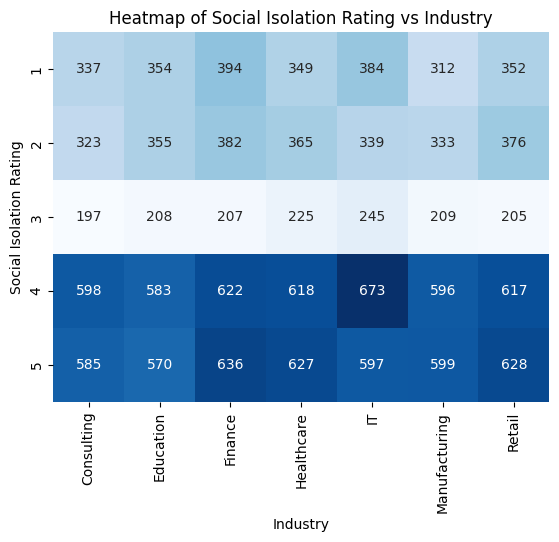

In [58]:
# Create a contingency table (cross-tab) between Social_Isolation_Rating and Industry
cross_tab_I = pd.crosstab(df_fixed['Social_Isolation_Rating'], df_fixed['Industry'])

# Plot the heatmap
sns.heatmap(cross_tab_I, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Heatmap of Social Isolation Rating vs Industry')
plt.xlabel('Industry')
plt.ylabel('Social Isolation Rating')
plt.show()

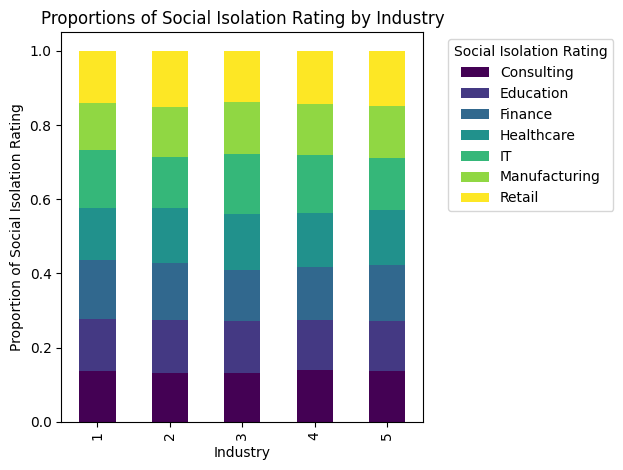

In [59]:
cross_tab_percent_I = cross_tab_I.div(cross_tab_I.sum(axis=1), axis=0)

# Plot the stacked bar chart
cross_tab_percent_I.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Proportions of Social Isolation Rating by Industry')
plt.xlabel('Industry')
plt.ylabel('Proportion of Social Isolation Rating')
plt.legend(title='Social Isolation Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

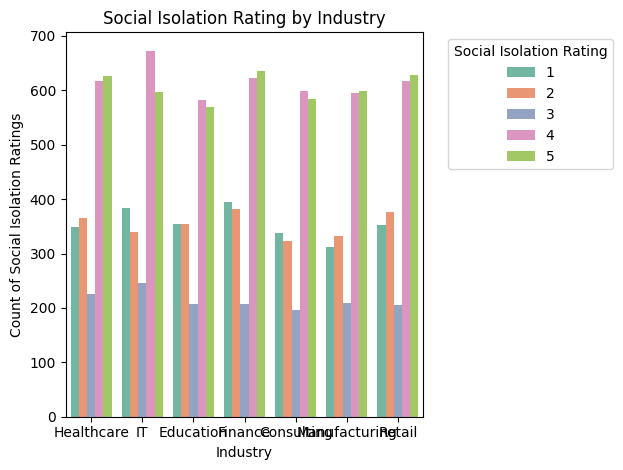

In [60]:
sns.countplot(data=df_fixed, x='Industry', hue='Social_Isolation_Rating', palette='Set2')
plt.title('Social Isolation Rating by Industry')
plt.xlabel('Industry')
plt.ylabel('Count of Social Isolation Ratings')
plt.legend(title='Social Isolation Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Not very helpful, again just shows similiar distribution amongst every industry based on social isolation rating. There are more high social isolation reporting in each category for industry, since there are just more of them to report than other groups.

## Social_Isolation_Rating versus Hours_Worked_Per_Week [Definite Trend]
- Trend Found: people who work less hours tend to report higher levels of social isolation. Those who could be considered full-time, or workers who engage in overtime to a certain extent, more often report lower levels of social isolation. Being overworked results in an even distribution between all levels of social isolation. This suggests that have active full-time employment leads to lower social isolation, possibly due to having to be forced to interact with people. The less you work, might mean you have too much free time and aren't able to utilize it effectively, or can't simply because others are busy working. Overworking yourself evens out all reports, probably as a result of people responding differently to the physical exhaustion.

In [61]:
df_fixed['Hours_Worked_Per_Week'].unique()

array([43, 48, 59, 57, 50, 25, 22, 45, 23, 51, 29, 42, 30, 44, 49, 26, 41,
       24, 47, 21, 20, 55, 60, 27, 46, 28, 56, 53, 54, 52, 58],
      dtype=int64)

In [62]:
df_fixed['Hours_Worked_Per_Week'].value_counts()

Hours_Worked_Per_Week
45    1258
42    1220
44    1196
43    1183
41    1155
49     462
47     459
50     442
28     434
22     425
48     425
23     421
52     420
25     414
46     414
29     414
26     410
30     400
20     397
21     395
27     395
24     391
51     367
54     213
55     204
60     198
57     184
56     183
59     183
53     172
58     166
Name: count, dtype: int64

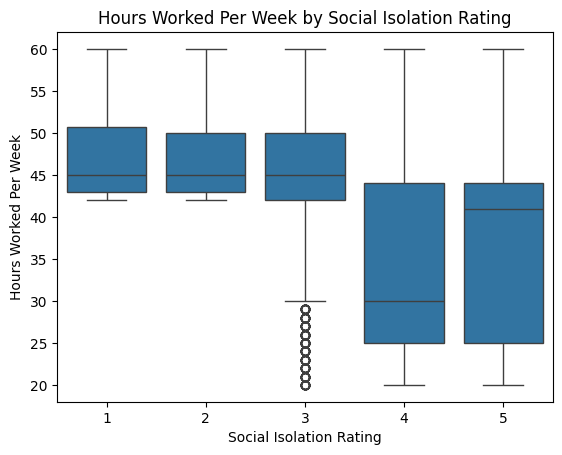

In [63]:
# Create a boxplot for Hours_Worked_Per_Week by Social_Isolation_Rating
sns.boxplot(x='Social_Isolation_Rating', y='Hours_Worked_Per_Week', data=df_fixed)
plt.title('Hours Worked Per Week by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Hours Worked Per Week')
plt.show()

Most significant chart made in this variable comparison. The boxplots are not evenly distributed as in past charts, so there actually is something to see here. It would appear that a mid level of social isolation rating has the most outliers, which could be something to explore further. On the other hand, it showed that while there are people reporting throughout the entire range of work hours, it showed that the those reporting high social isolation are more likely than low reporters to be working less than what people would consider full time employment. Could this be seen as people being unable to work long hours due to some mental health condition preventing them from seeking/gaining full time employment, or it the fact that they are not working as much mean that they are not exposed to social situations as much?
Perhaps it would benefit from grouping the work hours into part-time, full-time, and overworked?

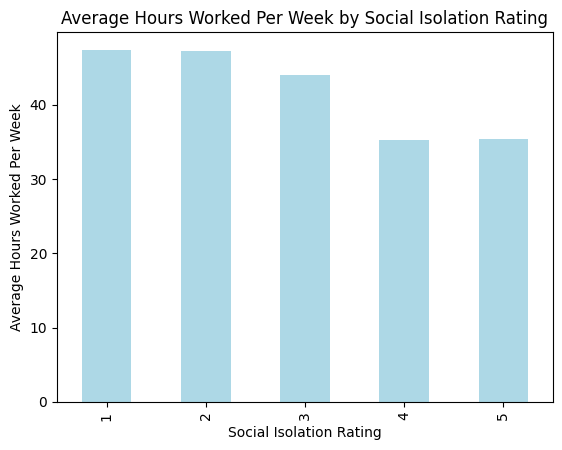

In [64]:
mean_hours = df_fixed.groupby('Social_Isolation_Rating')['Hours_Worked_Per_Week'].mean()

# Plot the bar chart
mean_hours.plot(kind='bar', color='lightblue')
plt.title('Average Hours Worked Per Week by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Average Hours Worked Per Week')
plt.show()

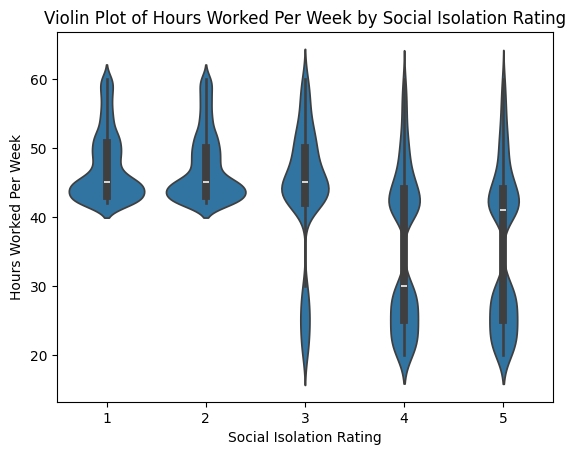

In [67]:
sns.violinplot(x='Social_Isolation_Rating', y='Hours_Worked_Per_Week', data=df_fixed)
plt.title('Violin Plot of Hours Worked Per Week by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Hours Worked Per Week')
plt.show()

Grouping based on employment engagement

Will attempt to categorize work hours into bins describing different levels of employment engagement (part-time, full-time, overtime, overworked). The basis of these groups are based on what is generally considered employment types based on hours, with overworked being a reported threshold in which people began to experience health issues. 

In [68]:
# Define the bins and labels for the categories
bins = [0, 30, 45, 55, float('inf')]  # These are the work hours limits
labels = ['Part-time', 'Full-time', 'Overtime', 'Overworked']

# Create a new column 'Work_Hours_Category' based on 'Hours_Worked_Per_Week'
df_fixed['Work_Hours_Category'] = pd.cut(df_fixed['Hours_Worked_Per_Week'], bins=bins, labels=labels, right=False)

# Check the result
df_fixed[['Hours_Worked_Per_Week', 'Work_Hours_Category']].head()

,Hours_Worked_Per_Week,Work_Hours_Category
0,43,Full-time
1,48,Overtime
2,43,Full-time
3,59,Overworked
4,57,Overworked


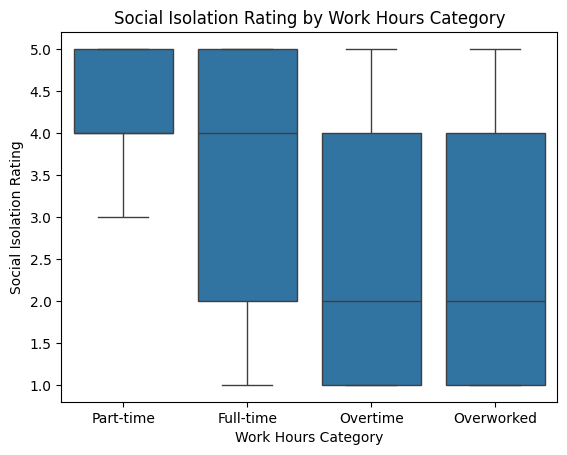

In [123]:
# Boxplot to compare Social_Isolation_Rating and Work_Hours_Category
sns.boxplot(x='Work_Hours_Category', y='Social_Isolation_Rating', data=df_fixed)
plt.title('Social Isolation Rating by Work Hours Category')
plt.xlabel('Work Hours Category')
plt.ylabel('Social Isolation Rating')
plt.show()

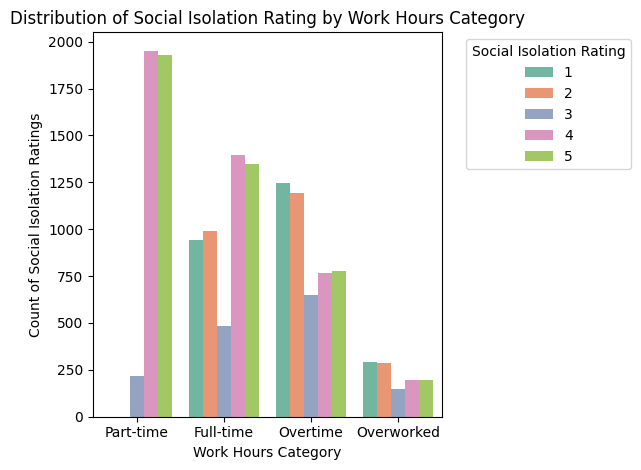

In [71]:
# Social Isolation 
sns.countplot(data=df_fixed, x='Work_Hours_Category', hue='Social_Isolation_Rating', palette='Set2')
plt.title('Distribution of Social Isolation Rating by Work Hours Category')
plt.xlabel('Work Hours Category')
plt.ylabel('Count of Social Isolation Ratings')
plt.legend(title='Social Isolation Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\eduar\AppData\Local\Temp\ipykernel_26060\3104485233.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_iso = df_fixed.groupby('Work_Hours_Category')['Social_Isolation_Rating'].mean()


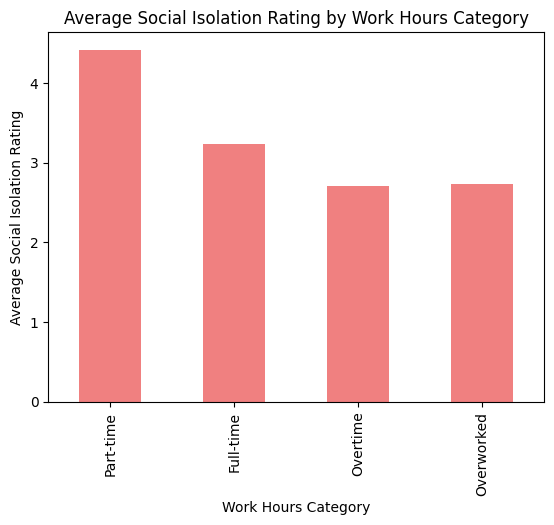

In [72]:
# Calculate the mean Social Isolation Rating for each Work Hours Category
mean_iso = df_fixed.groupby('Work_Hours_Category')['Social_Isolation_Rating'].mean()

# Plot the bar chart
mean_iso.plot(kind='bar', color='lightcoral')
plt.title('Average Social Isolation Rating by Work Hours Category')
plt.xlabel('Work Hours Category')
plt.ylabel('Average Social Isolation Rating')
plt.show()

In [73]:
import scipy.stats as stats

# Perform one-way ANOVA
anova_result = stats.f_oneway(
    df_fixed[df_fixed['Work_Hours_Category'] == 'Part-time']['Social_Isolation_Rating'],
    df_fixed[df_fixed['Work_Hours_Category'] == 'Full-time']['Social_Isolation_Rating'],
    df_fixed[df_fixed['Work_Hours_Category'] == 'Overtime']['Social_Isolation_Rating'],
    df_fixed[df_fixed['Work_Hours_Category'] == 'Overworked']['Social_Isolation_Rating']
)

print(f'ANOVA Result: F-statistic={anova_result.statistic}, p-value={anova_result.pvalue}')

ANOVA Result: F-statistic=1436.8659689182264, p-value=0.0


Definite proof that there is some sort of trend when comparing work hours to social isolation rating. It would seem that the less hours a person works a week, the more likely they are to report high social isolation. As these people begin to work more hours, into full time and overtime hours, there are more reports of low social isolation and lowered reports of high isolation. These both then plateaus have similar reportings once they begin to be overworked. This would imply that there is a sweet spot in maintaining a low social isolation, where so long as a person is working full-time or at overtime they will have a better chance at reporting low social isolation. Being overworked however would lead to it being more random, as the social isolation ratings were similar across the board when overworked. This may just be how people react when they begin to feel the physical pressure of their workload.

## Social_Isolation_Rating versus Productivity_Change

In [74]:
df_fixed['Productivity_Change'].unique()

array(['Decrease', 'Increase', 'No Change'], dtype=object)

In [75]:
df_fixed['Productivity_Change'].value_counts()

Productivity_Change
Increase     6134
No Change    5515
Decrease     3351
Name: count, dtype: int64

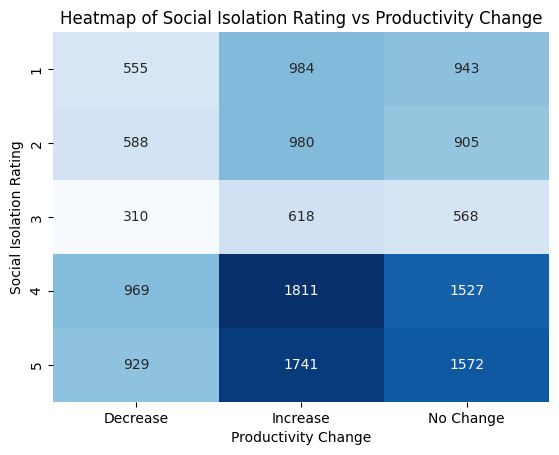

In [76]:
# Create a contingency table between Social_Isolation_Rating and Productivity_Change
cross_tab_p = pd.crosstab(df_fixed['Social_Isolation_Rating'], df_fixed['Productivity_Change'])

# Plot the heatmap
sns.heatmap(cross_tab_p, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Heatmap of Social Isolation Rating vs Productivity Change')
plt.xlabel('Productivity Change')
plt.ylabel('Social Isolation Rating')
plt.show()

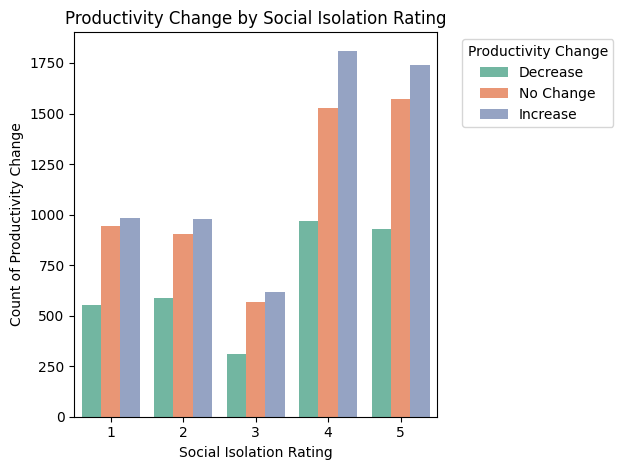

In [79]:
sns.countplot(data=df_fixed, x='Social_Isolation_Rating', hue='Productivity_Change', palette='Set2')
plt.title('Productivity Change by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Count of Productivity Change')
plt.legend(title='Productivity Change', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Not very helpful, it appears a somewhat similar distribution based on the relative proportions of the groups of social isolation ratings. There isn't much to describe here.

## Social_Isolation_Rating versus Stress_Level
- Categorical
- Fairly evenly distributed across each category

In [80]:
df_fixed['Stress_Level'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [81]:
df_fixed['Stress_Level'].value_counts()

Stress_Level
High      5058
Medium    5007
Low       4935
Name: count, dtype: int64

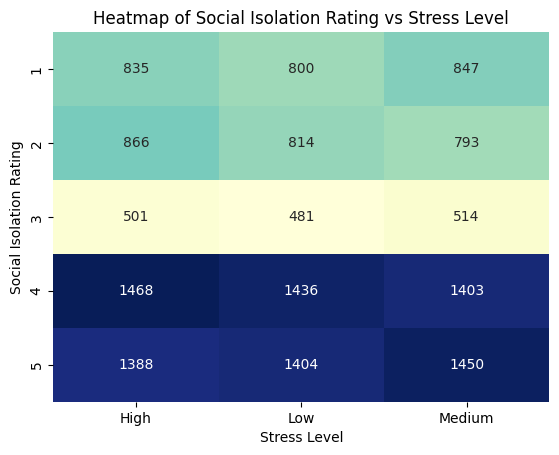

In [82]:
# Create a contingency table (cross-tab) between Social_Isolation_Rating and Stress_Level
cross_tab_st = pd.crosstab(df_fixed['Social_Isolation_Rating'], df_fixed['Stress_Level'])

# Plot the heatmap
sns.heatmap(cross_tab_st, annot=True, cmap='YlGnBu', fmt='d', cbar=False)
plt.title('Heatmap of Social Isolation Rating vs Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Social Isolation Rating')
plt.show()

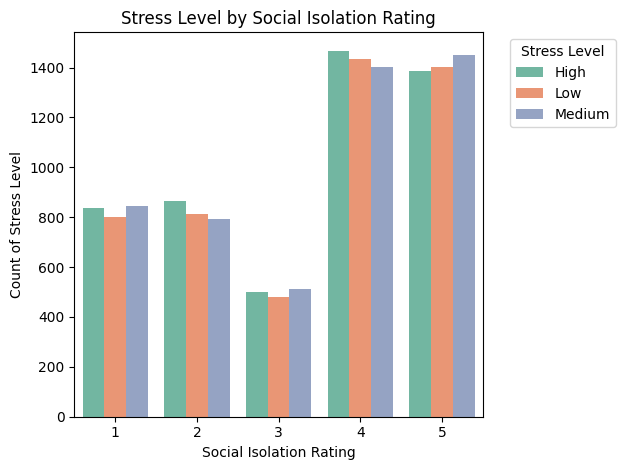

In [83]:
sns.countplot(data=df_fixed, x='Social_Isolation_Rating', hue='Stress_Level', palette='Set2')
plt.title('Stress Level by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Count of Stress Level')
plt.legend(title='Stress Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Most likely not useful. The charts just show that there is an even distribution of stress levels across each isolation rating. The limiting factor is just the amount of people that are reporting at each social isolation rating. Perhaps, social isolation is not really affecting the stress people are experiencing at work, or in general.

## Social_Isolation versus Mental_Health_Condition
- Categorical
- The categories are not evenly distributed, with about half the data reporting feeling stable (correction from not reporting mental health issue) and the other half reporting a type of mental health issue.

In [84]:
df_fixed['Mental_Health_Condition'].unique()

array(['Depression', 'Anxiety', 'Stable', 'Burnout'], dtype=object)

In [85]:
df_fixed['Mental_Health_Condition'].value_counts()

Mental_Health_Condition
Stable        6153
Anxiety       3873
Depression    3708
Burnout       1266
Name: count, dtype: int64

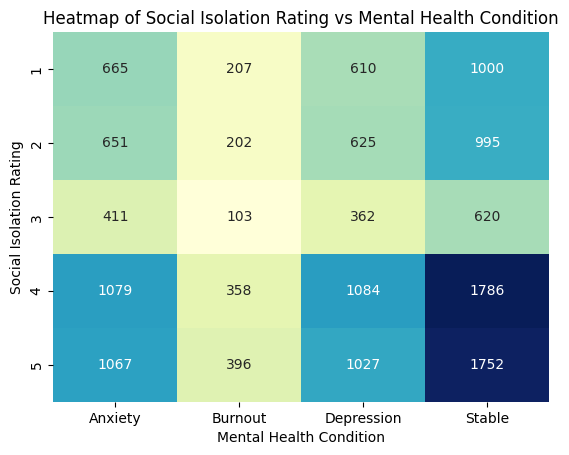

In [87]:
# Create a contingency table between Social_Isolation_Rating and Mental_Health_Condition
cross_tab_m = pd.crosstab(df_fixed['Social_Isolation_Rating'], df_fixed['Mental_Health_Condition'])

# Plot the heatmap
sns.heatmap(cross_tab_m, annot=True, cmap='YlGnBu', fmt='d', cbar=False)
plt.title('Heatmap of Social Isolation Rating vs Mental Health Condition')
plt.xlabel('Mental Health Condition')
plt.ylabel('Social Isolation Rating')
plt.show()

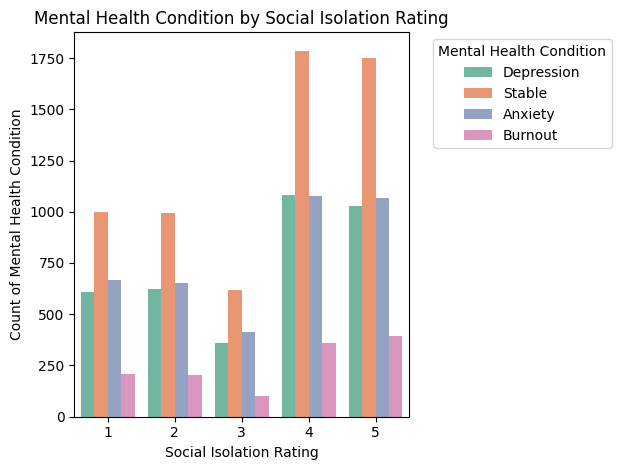

In [88]:
# Grouped bar charts
sns.countplot(data=df_fixed, x='Social_Isolation_Rating', hue='Mental_Health_Condition', palette='Set2')
plt.title('Mental Health Condition by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Count of Mental Health Condition')
plt.legend(title='Mental Health Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Even distributions across the board, the data reflects how their are more reporting in any given social isolation based on the limitation of how many people are actually reporting that social isolation rating. Otherwise, each rating has similar distributions of mental health conditions.

## Social_Isolation_Rating versus Physical_Activity
- Categorical
- Somewhat even distribution between levels of activity

In [89]:
df_fixed['Physical_Activity'].unique()

array(['Weekly', 'None', 'Daily'], dtype=object)

In [90]:
df_fixed['Physical_Activity'].value_counts()

Physical_Activity
Weekly    5265
None      4887
Daily     4848
Name: count, dtype: int64

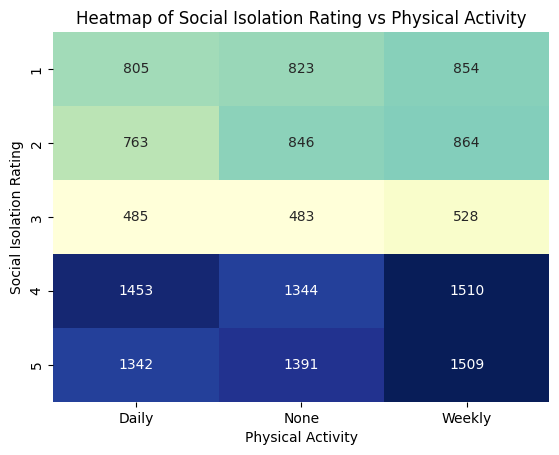

In [91]:
# Create a contingency table between Social_Isolation_Rating and Physical_Activity
cross_tab_phys = pd.crosstab(df_fixed['Social_Isolation_Rating'], df_fixed['Physical_Activity'])

# Plot the heatmap
sns.heatmap(cross_tab_phys, annot=True, cmap='YlGnBu', fmt='d', cbar=False)
plt.title('Heatmap of Social Isolation Rating vs Physical Activity')
plt.xlabel('Physical Activity')
plt.ylabel('Social Isolation Rating')
plt.show()

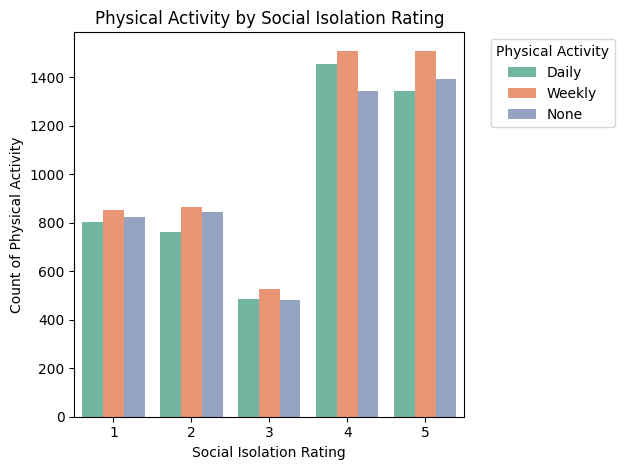

In [92]:
sns.countplot(data=df_fixed, x='Social_Isolation_Rating', hue='Physical_Activity', palette='Set2')
plt.title('Physical Activity by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Count of Physical Activity')
plt.legend(title='Physical Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Not useful, more of just an even distribuiton of physical activity amongst every level of social isolation. No discernible trend other than limits of reports in each category.

## Social_Isolation_Rating versus Sleep_Quality
- Categorical
- Somewhat even distribution of counts in each category
- Nothing really useful, even distribution across all age groups with more people reporting high social isolation in general.

In [93]:
df_fixed['Sleep_Quality'].unique()

array(['Good', 'Poor', 'Average'], dtype=object)

In [94]:
df_fixed['Sleep_Quality'].value_counts()

Sleep_Quality
Good       5061
Poor       5055
Average    4884
Name: count, dtype: int64

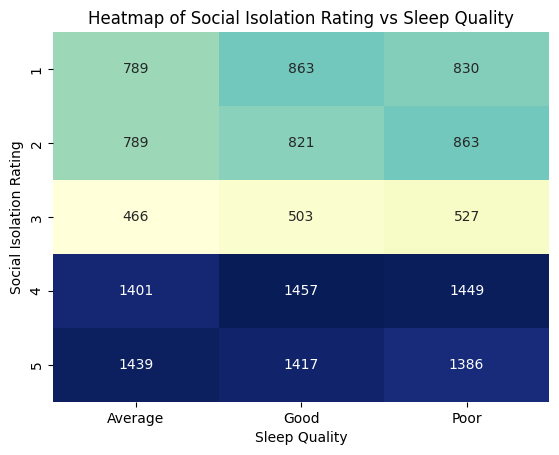

In [96]:
# Create a contingency table between Social_Isolation_Rating and Sleep_Quality
cross_tab_sleep = pd.crosstab(df_fixed['Social_Isolation_Rating'], df_fixed['Sleep_Quality'])

# Plot the heatmap
sns.heatmap(cross_tab_sleep, annot=True, cmap='YlGnBu', fmt='d', cbar=False)
plt.title('Heatmap of Social Isolation Rating vs Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Social Isolation Rating')
plt.show()

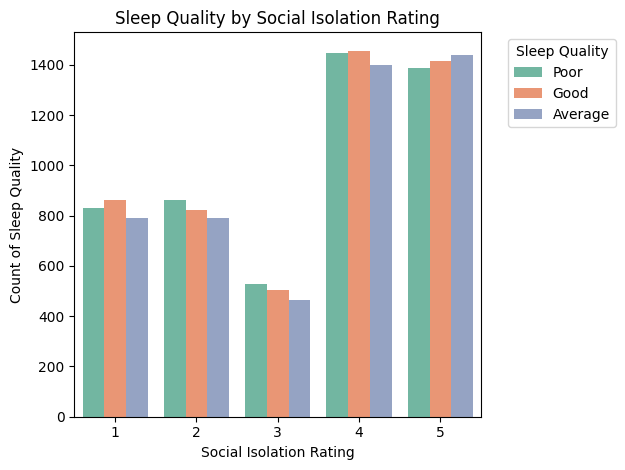

In [97]:
sns.countplot(data=df_fixed, x='Social_Isolation_Rating', hue='Sleep_Quality', palette='Set2')
plt.title('Sleep Quality by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Count of Sleep Quality')
plt.legend(title='Sleep Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Not very helpful either. More of just an even distribution of sleep quality against each social isolation rating.

## Social_Isolation_Rating versus Age

In [98]:
df_fixed['Age'].unique()

array([32, 40, 59, 27, 49, 31, 42, 56, 30, 33, 47, 51, 36, 45, 26, 43, 53,
       22, 37, 48, 46, 24, 54, 57, 35, 60, 25, 50, 28, 23, 38, 29, 58, 55,
       41, 44, 34, 52, 39], dtype=int64)

In [99]:
df_fixed['Age'].value_counts()

Age
53    456
45    447
25    435
23    426
58    414
50    414
24    414
47    414
43    411
48    408
56    408
42    405
57    405
40    405
32    399
30    399
49    396
36    396
22    393
28    393
39    390
51    387
27    387
60    375
52    375
31    372
41    372
46    363
34    360
33    357
59    357
35    357
38    345
55    336
29    336
37    336
44    333
26    327
54    297
Name: count, dtype: int64

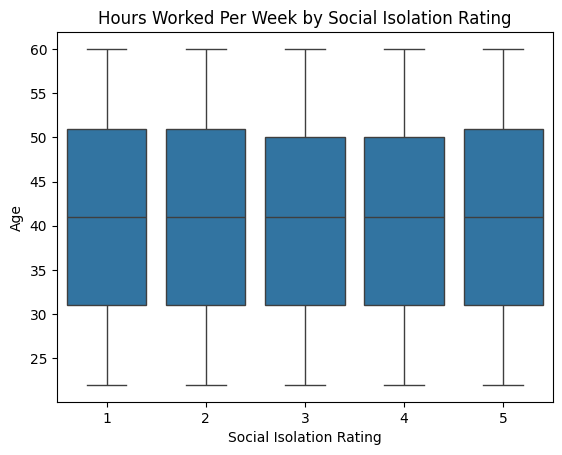

In [100]:
# Create a boxplot for Hours_Worked_Per_Week by Social_Isolation_Rating
sns.boxplot(x='Social_Isolation_Rating', y='Age', data=df_fixed)
plt.title('Hours Worked Per Week by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Age')
plt.show()

In [102]:
# Define the bins and labels for the categories
bins = [20, 30, 40, 50, float('inf')]  # These are the work hours limits
labels = ['20s', '30s', '40s', '50s']

# Create a new column 'Work_Hours_Category' based on 'Hours_Worked_Per_Week'
df_fixed['Age_Groups'] = pd.cut(df_fixed['Age'], bins=bins, labels=labels, right=False)

# Check the result
df_fixed[['Age', 'Age_Groups']].head()

,Age,Age_Groups
0,32,30s
1,40,40s
2,59,50s
3,27,20s
4,49,40s


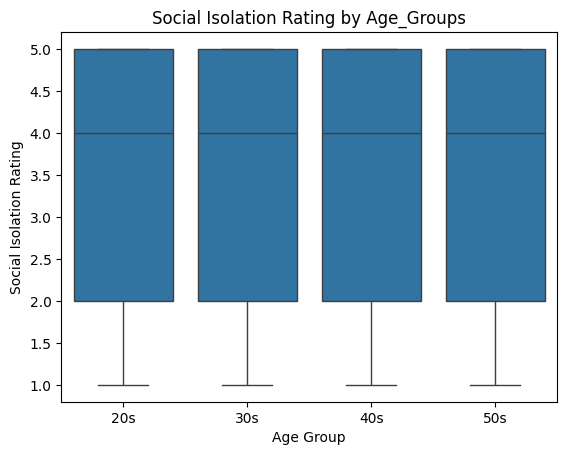

In [103]:
# Boxplot to compare Social_Isolation_Rating and Work_Hours_Category
sns.boxplot(x='Age_Groups', y='Social_Isolation_Rating', data=df_fixed)
plt.title('Social Isolation Rating by Age_Groups')
plt.xlabel('Age Group')
plt.ylabel('Social Isolation Rating')
plt.show()

## Further Analysis:

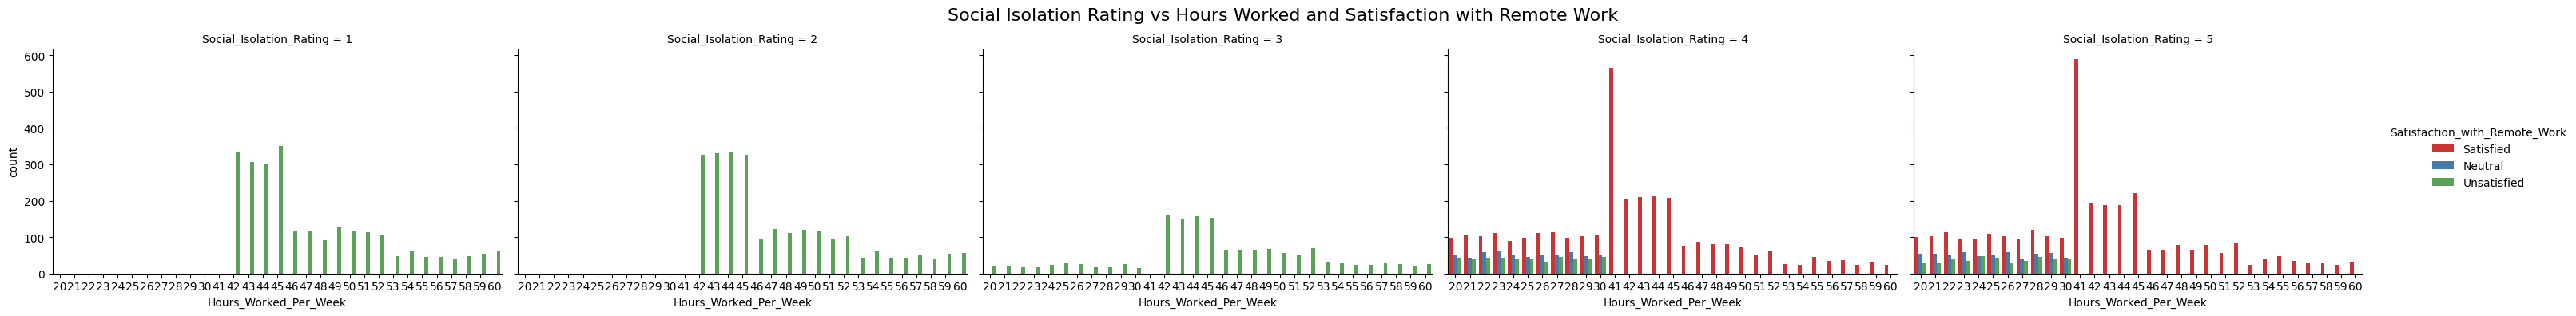

In [104]:
sns.catplot(data=df_fixed, x='Hours_Worked_Per_Week', hue='Satisfaction_with_Remote_Work', col='Social_Isolation_Rating', kind='count', height=4, aspect=1.5, palette='Set1')
plt.subplots_adjust(top=0.85)
plt.suptitle('Social Isolation Rating vs Hours Worked and Satisfaction with Remote Work', fontsize=16)
plt.show()

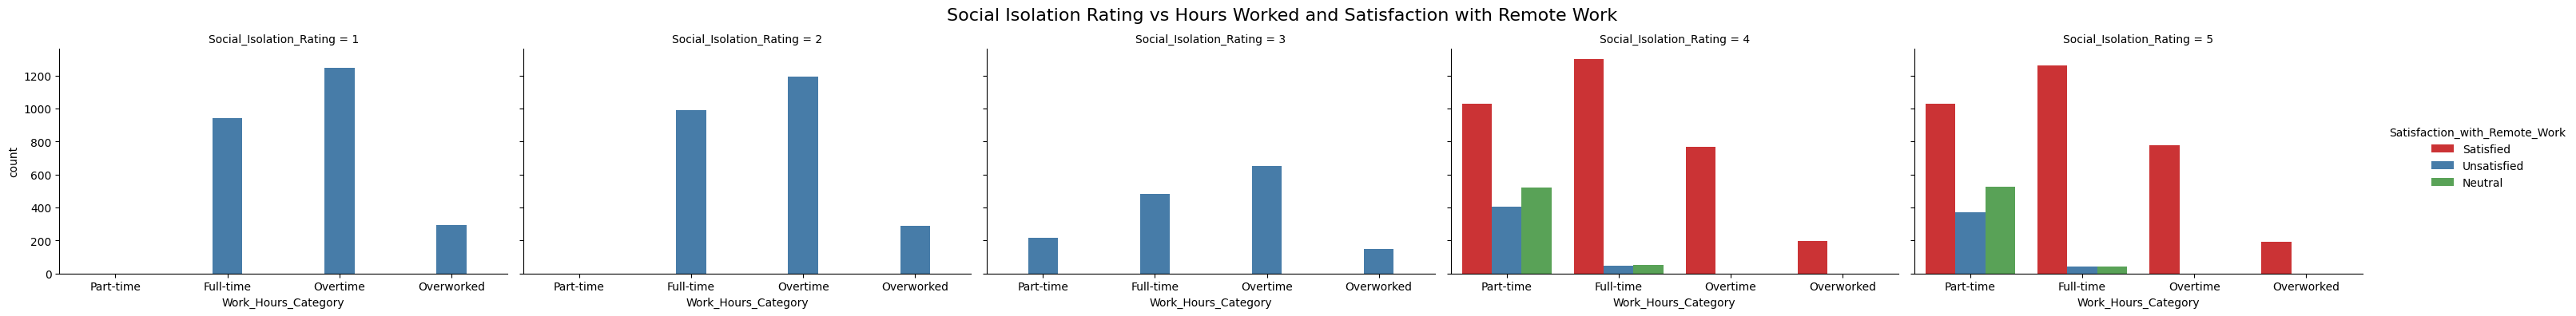

In [105]:
sns.catplot(data=df_fixed, x='Work_Hours_Category', hue='Satisfaction_with_Remote_Work', col='Social_Isolation_Rating', kind='count', height=4, aspect=1.5, palette='Set1')
plt.subplots_adjust(top=0.85)
plt.suptitle('Social Isolation Rating vs Hours Worked and Satisfaction with Remote Work', fontsize=16)
plt.show()

In [107]:
from scipy.stats import chi2_contingency

# Create a contingency table for Hours_Worked_Per_Week and Satisfaction_with_Remote_Work against Social_Isolation_Rating
contingency_table = pd.crosstab([df_fixed['Work_Hours_Category'], df_fixed['Satisfaction_with_Remote_Work']], df_fixed['Social_Isolation_Rating'])

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Stat: {chi2_stat}")
print(f"P-Value: {p_val}")

Chi-Square Stat: 14401.14677078064
P-Value: 0.0


In [108]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Encode the categorical variables
le = LabelEncoder()
df_fixed['Social_Isolation_Rating_encoded'] = le.fit_transform(df_fixed['Social_Isolation_Rating'])
df_fixed['Hours_Worked_Per_Week_encoded'] = le.fit_transform(df_fixed['Hours_Worked_Per_Week'])
df_fixed['Satisfaction_with_Remote_Work_encoded'] = le.fit_transform(df_fixed['Satisfaction_with_Remote_Work'])

# Create the model
X = df_fixed[['Hours_Worked_Per_Week_encoded', 'Satisfaction_with_Remote_Work_encoded']]
y = df_fixed['Social_Isolation_Rating_encoded']

X = sm.add_constant(X)  # Add an intercept term to the model
model = sm.MNLogit(y, X)

# Fit the model
result = model.fit()

# Print the summary
print(result.summary())


         Current function value: 0.917879
         Iterations: 35


C:\Users\eduar\anaconda3\envs\dev\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                 MNLogit Regression Results                                
Dep. Variable:     Social_Isolation_Rating_encoded   No. Observations:                15000
Model:                                     MNLogit   Df Residuals:                    14988
Method:                                        MLE   Df Model:                            8
Date:                             Sun, 10 Nov 2024   Pseudo R-squ.:                  0.4041
Time:                                     12:08:25   Log-Likelihood:                -13768.
converged:                                   False   LL-Null:                       -23104.
Covariance Type:                         nonrobust   LLR p-value:                     0.000
    Social_Isolation_Rating_encoded=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -9.4623   1

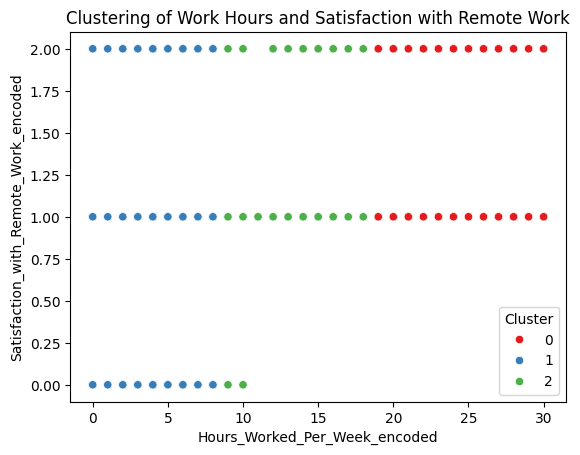

In [109]:
from sklearn.cluster import KMeans
import numpy as np

# Select the relevant features for clustering
features = df_fixed[['Hours_Worked_Per_Week_encoded', 'Satisfaction_with_Remote_Work_encoded']]

# Apply K-Means clustering (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df_fixed['Cluster'] = kmeans.fit_predict(features)

# Plot the clusters
sns.scatterplot(data=df_fixed, x='Hours_Worked_Per_Week_encoded', y='Satisfaction_with_Remote_Work_encoded', hue='Cluster', palette='Set1')
plt.title('Clustering of Work Hours and Satisfaction with Remote Work')
plt.show()

## Charts needed for presentation:

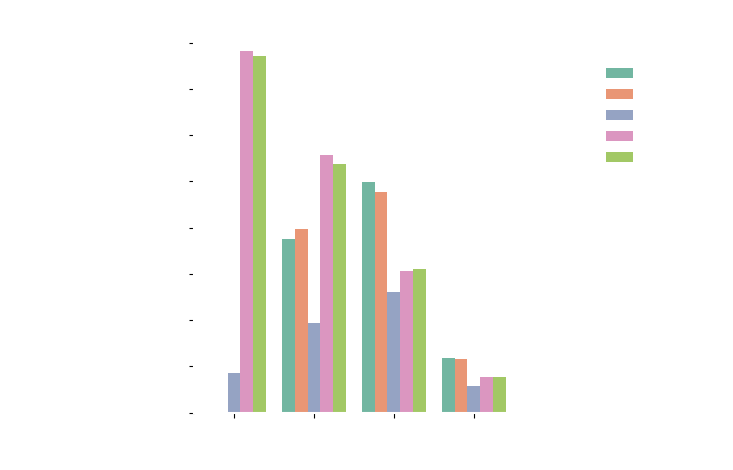

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=df_fixed, x='Work_Hours_Category', hue='Social_Isolation_Rating', palette='Set2')
# Set the title with white color and bold font
plt.title('Distribution of Social Isolation Rating by Work Hours Category', color='white', fontsize=14, fontweight='bold')
# Set the x and y labels with white color and bold font
plt.xlabel('Work Hours Category', color='white', fontsize=12, fontweight='bold')
plt.ylabel('Count of Social Isolation Ratings', color='white', fontsize=12, fontweight='bold')
# Customize the x and y ticks to be white and bold
plt.xticks(color='white', fontweight='bold')
plt.yticks(color='white', fontweight='bold')
# Set the border color of the plot to white for spine in
for spine in plt.gca().spines.values():
    spine.set_edgecolor('white')
    spine.set_linewidth(1.5)
# Customize the legend
legend = plt.legend(title='Social Isolation Rating', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.setp(legend.get_texts(), color='white', fontweight='bold') # Set legend text color and weight
legend.get_title().set_color('white') # Set legend title color
legend.get_title().set_fontweight('bold') # Set legend title font weight
# Set transparent background for the legend
legend.get_frame().set_alpha(0) # Make legend background transparent
legend.get_frame().set_edgecolor('white') # Set the legend border color to white
# Set a transparent background for the plot
plt.gcf().patch.set_alpha(0) # Transparent figure background
plt.gca().patch.set_alpha(0) # Transparent axes background
# Save the plot with a transparent background
plt.savefig("social_isolation_by_work_hours_transparent.png", transparent=True, dpi=300, bbox_inches='tight')
# Display the plot with tight layout
plt.tight_layout()
plt.show() 

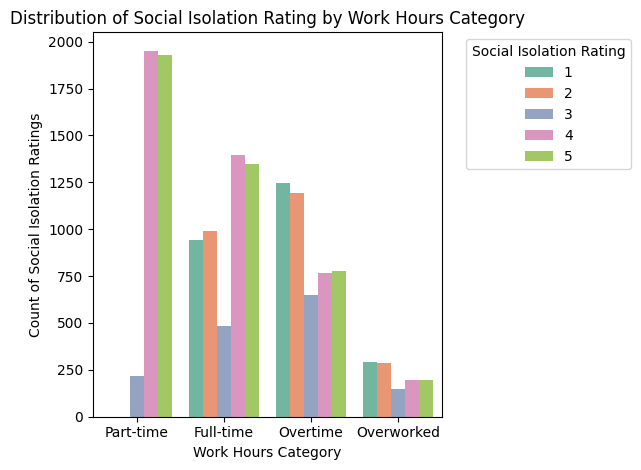

In [125]:
# Social Isolation versus Work Hours Category edited to save for work
sns.countplot(data=df_fixed, x='Work_Hours_Category', hue='Social_Isolation_Rating', palette='Set2')
plt.title('Distribution of Social Isolation Rating by Work Hours Category')
plt.xlabel('Work Hours Category')
plt.ylabel('Count of Social Isolation Ratings')
plt.legend(title='Social Isolation Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
# Save the plot
plt.savefig("social_isolation_by_work_hours.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

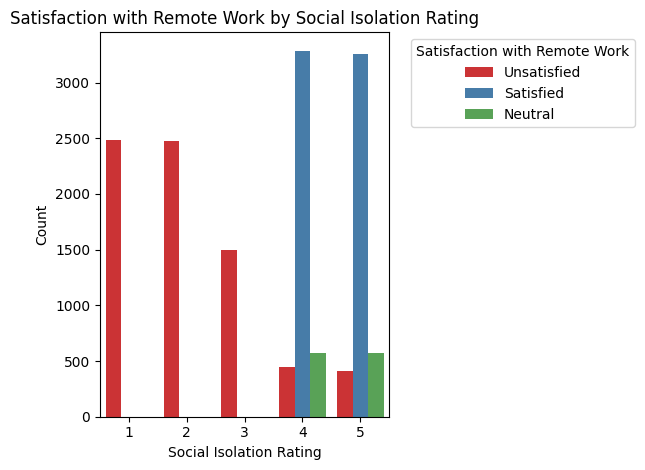

In [127]:
# Satisfaction with Remote Work by Social Isolation Rating
sns.countplot(data=df_fixed, x='Social_Isolation_Rating', hue='Satisfaction_with_Remote_Work', palette='Set1')
plt.title('Satisfaction with Remote Work by Social Isolation Rating')
plt.xlabel('Social Isolation Rating')
plt.ylabel('Count')
plt.legend(title='Satisfaction with Remote Work', bbox_to_anchor=(1.05, 1), loc='upper left')
# Save the plot
plt.savefig("social_isolation_by_satisfaction_w_remote_work.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

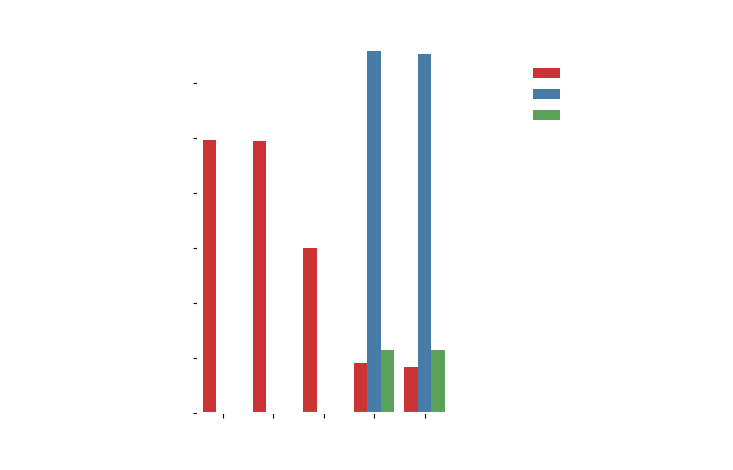

In [128]:
#Create the countplot
sns.countplot(data=df_fixed, x='Social_Isolation_Rating', hue='Satisfaction_with_Remote_Work', palette='Set1')
plt.title('Satisfaction with Remote Work by Social Isolation Rating', color='white', fontsize=14, fontweight='bold')
# Set the x and y labels with white color and bold font
plt.xlabel('Social Isolation Rating', color = 'white', fontsize=12, fontweight='bold')
plt.ylabel('Count', color='white', fontsize=12, fontweight='bold')
# Customize the x and y ticks to be white and bold
plt.xticks(color='white', fontweight='bold')
plt.yticks(color='white', fontweight='bold')
# Set the border color of the plot to white for spine in
for spine in plt.gca().spines.values():
    spine.set_edgecolor('white')
    spine.set_linewidth(1.5)
# Customize the legend
legend = plt.legend(title='Satisfaction with Remote Work', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.setp(legend.get_texts(), color='white', fontweight='bold') # Set legend text color and weight
legend.get_title().set_color('white') # Set legend title color
legend.get_title().set_fontweight('bold') # Set legend title font weight
# Set transparent background for the legend
legend.get_frame().set_alpha(0) # Make legend background transparent
legend.get_frame().set_edgecolor('white') # Set the legend border color to white
# Set a transparent background for the plot
plt.gcf().patch.set_alpha(0) # Transparent figure background
plt.gca().patch.set_alpha(0) # Transparent axes background
# Save the plot with a transparent background
plt.savefig("social_isolation_by_satisfaction_w_remote_work_transparent.png", transparent=True, dpi=300, bbox_inches='tight')
# Display the plot with tight layout
plt.tight_layout()
plt.show() 